In [1]:
from polytune import create_job, Experiment, SearchSpace, Real
from math import sin

In [2]:
space = SearchSpace()
space.add_parameter(Real('x', low=0.0, high=5.0))
space.add_parameter(Real('y', low=0.0, high=2.0))

In [3]:
def objective(experiment: Experiment):
    x = experiment.params.get('x')
    y = experiment.params.get('y')

    return (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

In [4]:
job = create_job(space)

In [5]:
job.do(objective, n_trials=1500, n_proc=5, algo_list=['grid'])

/Users/qnbhd/Development/polytune/polytune/search/algorithms/grid.py:46: UserWarning: Per emit count not implemented.
  warnings.warn('Per emit count not implemented.')
/Users/qnbhd/Development/polytune/polytune/jobs/job.py:159: UserWarning: No new configurations.
  warnings.warn('No new configurations.')


In [6]:
job.best_parameters

{'x': 3.0, 'y': 0.5}

Text(0, 0.5, 'y')

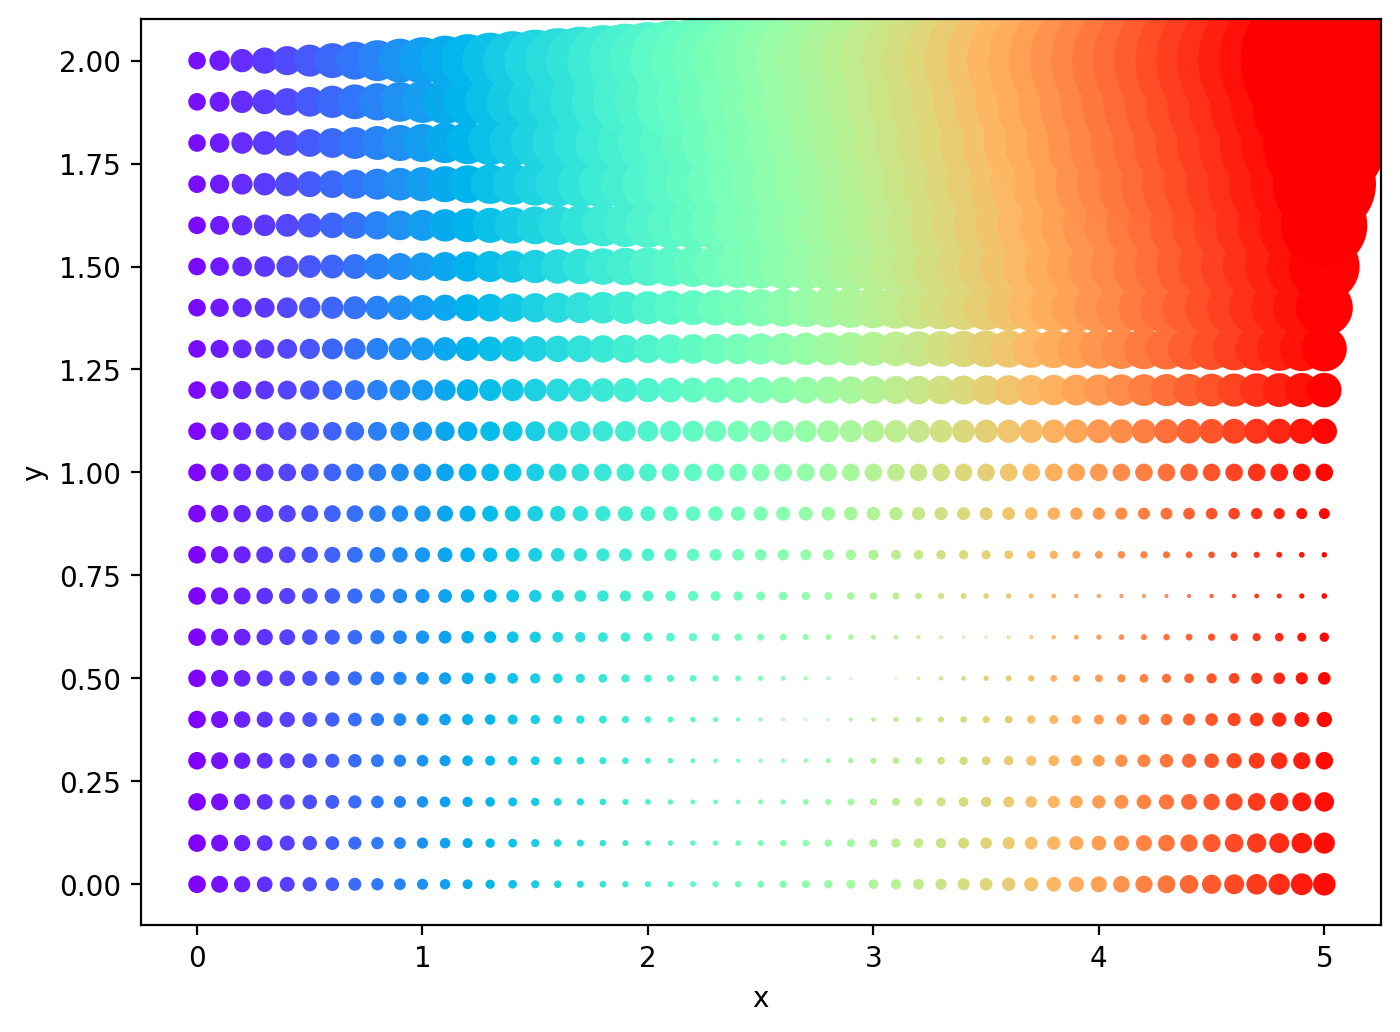

In [13]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm
import numpy

figure(figsize=(8, 6), dpi=200)

df = job.dataframe

df['objective_result'] = df['objective_result'].multiply(2)
colors = cm.rainbow(numpy.linspace(0, 1, len(df['x'])))

plt.scatter(df['x'], df['y'], df['objective_result'], color=colors)
plt.xlabel('x')
plt.ylabel('y')